# Создание базы эмбеддингов:

https://drive.google.com/drive/folders/1DuDt6MDKXMWQNz6xF_JamGfZWBThG2RN?usp=sharing

https://drive.google.com/file/d/140QHMm_OMpKvhtKRtJSCFl2Wvpn3FScW/view?usp=drive_link


In [96]:
# !pip install openai==0.27.8 langchain==0.0.240 chromadb==0.4.2 faiss-cpu==1.7.4 tiktoken==0.4.0 pydantic==1.10.8
!pip install chromadb==0.4.2 pydantic==1.10.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━

In [56]:
!pip install faiss-cpu langchain==0.0.262 openai==0.28.0 tiktoken

In [57]:
import os
import getpass
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
import re
import requests
import openai
from langchain.docstore.document import Document
openai_key = getpass.getpass("OpenAI API Key:")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

OpenAI API Key:··········


In [58]:
from langchain.text_splitter import MarkdownHeaderTextSplitter
import matplotlib.pyplot as plt
from langchain.chat_models import ChatOpenAI
from langchain.schema import SystemMessage
import tiktoken

In [59]:
# функция для загрузки документа по ссылке из гугл драйв
def load_document_text(url: str) -> str:
    # Extract the document ID from the URL
    match_ = re.search('/file/d/([a-zA-Z0-9-_]+)', url)
    if match_ is None:
        raise ValueError('Invalid Google Docs URL')
    doc_id = match_.group(1)

    # Download the document as plain text
    response = requests.get(f'https://docs.google.com/document/d/{doc_id}/export?format=txt')
    response.raise_for_status()
    text = response.text

    return text

In [60]:
# db_url = 'https://drive.google.com/file/d/140QHMm_OMpKvhtKRtJSCFl2Wvpn3FScW/view?usp=drive_link'
# url = 'https://drive.google.com/file/d/1rmBvc34xj4G6X6dFPdyEtUdsNptqwIps/view?usp=drive_link'

In [61]:
# text_doc = load_document_text(url=db_url)

In [64]:
import gdown

# Загружаем файл по ссылке и сохраняем его с локальным именем 'file.txt'
# url = 'https://drive.google.com/uc?id=140QHMm_OMpKvhtKRtJSCFl2Wvpn3FScW'  # Вся база
url = 'https://drive.google.com/uc?id=1rmBvc34xj4G6X6dFPdyEtUdsNptqwIps'  # Только первая ## почему-то дубли
url = 'https://drive.google.com/uc?id=1YRQoX6rk__RE4eGXx_dRfnpofERSWNQA'  # Только первая база
# url = 'https://drive.google.com/uc?id=1d8C4VGDtzbo8hQhePSz6yfWRy4gXkEQvcmuGKxeZLXI'
output = 'file.txt'
gdown.download(url, output, quiet=False)

# Читаем содержимое файла
with open(output, 'r') as file:
    text = file.read()

# Выводим содержимое файла
print('\n', text[:50])

Downloading...
From: https://drive.google.com/uc?id=1YRQoX6rk__RE4eGXx_dRfnpofERSWNQA
To: /content/file.txt
100%|██████████| 3.68M/3.68M [00:00<00:00, 169MB/s]


 ﻿# Livan хочет привезти в Россию электромобиль. Ра


In [65]:

url2 = 'https://drive.google.com/uc?id=1NBEBY4dtE8bIb5ZQbh4AWSfmt0I5trg1'  # Ответы экспертов
output2 = 'file2.txt'
gdown.download(url2, output2, quiet=False)

# Читаем содержимое файла
with open(output2, 'r') as file:
    text2 = file.read()

# Выводим содержимое файла
print(text2[:50])

Downloading...
From: https://drive.google.com/uc?id=1NBEBY4dtE8bIb5ZQbh4AWSfmt0I5trg1
To: /content/file2.txt
100%|██████████| 2.85k/2.85k [00:00<00:00, 5.44MB/s]

# Китайские автомобили которые подходят для активн


In [66]:
text = text2 + text

In [8]:
text[:5000]

'\ufeff# Китайские автомобили которые подходят для активного отдыха и рыбалки:\n Omoda C5: полнопривод, идеален для приключений. Forthing Yacht: просторный минивэн, удобен для выездов. Geely Coolray: компактный, хорош для активности. Alsvin: седан,  удобен для дальних поездок. Eado Plus: седан, простор для снаряжения. JAC JS6: вместительный, подходит для природы. Voyah Free: электрический, тихий для отдыха. Geely  Tugella: стильный, функционален для активности. Haval Monster: мощный, надёжен для бездорожья. Tank 300: робастный, идеален для экспедиций. Haval H6, M6 Plus, Cool Dog,  Mystical Beast: разнообразие, подходят для приключений. Haval M6: комфортный, доступный для вылазок. Соллерс Атлант: универсален, подходит для активности. Jetour X70  Plus: просторный, хорош для отдыха. Chery Tiggo 4, Haval F7x: универсальные, подходят для природы. Lada X-Cross 5: надёжен, подходит для выездов. Forthing M7:  вместительный, удобен для активности. Haval Jolion: стильный, функционален для вылазо

In [10]:
# text = text.replace('\t', ' ')

In [67]:
to_replace = [ ('# Электрический седан Exeed привезут в Россию. Первые подробности', ' Электрический седан Exeed привезут в Россию. Первые подробности'),
               ('# В Great Wall раскрыли цены и комплектации пикапа Poer Kingkong. Названа дата старта продаж', ' В Great Wall раскрыли цены и комплектации пикапа Poer Kingkong. Названа дата старта продаж'),
               ('# Evolute i-SKY готовят к выходу российский рынок. Кроссовер тестируют морозами', ' Evolute i-SKY готовят к выходу российский рынок. Кроссовер тестируют морозами'),
               ('# Планы по «озеленению». В России станет больше электрокаров и гибридов Chery', ' Планы по «озеленению». В России станет больше электрокаров и гибридов Chery'),
               ('# Компания Dayun официально пришла в Россию. Что это за бренд и какие автомобили привезет', ' Компания Dayun официально пришла в Россию. Что это за бренд и какие автомобили привезет'),
               ('# Доступный и практичный. Haval анонсировал продажи нового кроссовера в России', ' Доступный и практичный. Haval анонсировал продажи нового кроссовера в России'),
               ('# и выше', ' и выше'),
               ('# Таймер запущен. Седан Omoda S5 в России представят на следующей неделе', ' Таймер запущен. Седан Omoda S5 в России представят на следующей неделе'),
               ('\t', ' ')
]
for i in to_replace:
  text = text.replace(i[0], i[1])

In [68]:
len(text)

2223793

In [69]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
      """Возвращает количество токенов в строке"""
      encoding = tiktoken.get_encoding(encoding_name)
      num_tokens = len(encoding.encode(string))
      return num_tokens

def split_text(text, max_count):
    headers_to_split_on = [
        ("#", "Header 1"),
        ("##", "Header 2"),
        ("###", "Header 3")
    ]

    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
    fragments = markdown_splitter.split_text(text)

    # Подсчет токенов для каждого фрагмента и построение графика
    fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in fragments]
    plt.hist(fragment_token_counts, bins=50, alpha=0.5, label='Fragments', log=True)
    plt.title('Distribution of Fragment Token Counts')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()

    splitter = RecursiveCharacterTextSplitter(
        chunk_size=max_count,
        chunk_overlap=0,
        length_function=lambda x: num_tokens_from_string(x, "cl100k_base")
    )

    source_chunks = [
        Document(page_content=chunk, metadata=fragment.metadata)
        for fragment in fragments
        for chunk in splitter.split_text(fragment.page_content)
    ]

    # Подсчет токенов для каждого source_chunk и построение графика
    source_chunk_token_counts = [num_tokens_from_string(chunk.page_content, "cl100k_base") for chunk in source_chunks]
    plt.hist(source_chunk_token_counts, bins=20, alpha=0.5, label='Source Chunks')
    plt.title('Distribution of Source Chunk Token Counts')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()

    return source_chunks, fragments

In [13]:
# source_chunks, fragments = split_text(text, 950)

In [16]:
# fragments[1910]

In [70]:
pattern = r'(#+)(.*)'
# pattern = r'#.*?[\.\n]'
headers = re.findall(pattern, text)



In [71]:
hset = set(headers)


In [72]:
# l_1, l_2, l_3, l_4 = '', '', '', ''
# for head in headers:
#   if head[0] == '#':
#     l_1 = head[1]
#     text = text.replace('#' + l_1, '#' + l_1 + '\t\n'+l_1)
#     print('# ' + l_1 + '\n'+l_1)
#   elif head[0] == '##':
#     l_2 = head[1]
#     text = text.replace('##' + l_2, '##' + l_2 + '\t\n' + l_1 + '\n' + l_2)
#   elif head[0] == '###':
#     l_3 = head[1]
#     text = text.replace('###' + l_3, '###' + l_3 + '\t\n' + l_1 + '\n' + l_2 + '\n' + l_3)
#   # elif head[0] == '####':
#   #   l_4 = head[1]
#   #   text = text.replace(l_4, l_4 + '\n' + l_1 + '\n' + l_2 + '\n' + l_3 + '\n' + l_4)

l_1, l_2, l_3, l_4 = '', '', '', ''
for head in hset:
  if head[0] == '#':
    l_1 = head[1]
    text = text.replace('#' + l_1, '#' + l_1 + '\t\n'+ l_1)
    print('# ' + l_1 + '\n'+l_1)
  elif head[0] == '##':
    l_2 = head[1]
    text = text.replace('##' + l_2, '##' + l_2 + '\t\n' + l_2)
  elif head[0] == '###':
    l_3 = head[1]
    text = text.replace('###' + l_3, '###' + l_3 + '\t\n'  + l_3)


#  Семь новинок и 240 точек продаж. Китайский топ-менеджер рассказал о планах бренда Livan
 Семь новинок и 240 точек продаж. Китайский топ-менеджер рассказал о планах бренда Livan
#  Скоро в продаже. На заводе «Москвич» началась серийная сборка автомобилей
 Скоро в продаже. На заводе «Москвич» началась серийная сборка автомобилей
#  Купить не глядя. Exeed начал прием заказов на кроссовер RX в России
 Купить не глядя. Exeed начал прием заказов на кроссовер RX в России
#  12 Changan хорошо, а еще два — лучше. Компания анонсировала очередные российские новинки
 12 Changan хорошо, а еще два — лучше. Компания анонсировала очередные российские новинки
#  «Стандарт», «Комфорт» и «Престиж». Стало известно, как оснастят лифтбек «Москвич 6»
 «Стандарт», «Комфорт» и «Престиж». Стало известно, как оснастят лифтбек «Москвич 6»
#  Кроссовер Skywell ET5 вышел на российский рынок. Названы цены и комплектации
 Кроссовер Skywell ET5 вышел на российский рынок. Названы цены и комплектации
#  От 20 тысяч д

In [18]:
text[:5000]

'\ufeff# Livan хочет привезти в Россию электромобиль. Разбираем возможные варианты\t\n Livan хочет привезти в Россию электромобиль. Разбираем возможные варианты\n[Livan новый](https://xn----7sbbeeptbfadjdvm5ab9bqj.xn--p1ai/wp-content/uploads/2023/11/livan_l9_1_1000-777x437.jpg)\n Posted By:  13.11.2023\nВ следующем году марка Livan планирует представить в России новый автомобиль. Подробности о машине пока держатся в секрете, но известно, что она будет оснащена электрической силовой установкой. Исходя из этого, «Китайские автомобили» решили вспомнить все электрокары бренда, которые представлены на рынке Поднебесной.\nВ самом начале будет не лишним напомнить, что марка Livan является совместным предприятием, созданным компаниями Geely и Lifan. Поэтому большая часть её автомобилей базируется на основе серийных моделей Geely. Например, уже представленные в России кроссоверы Livan X3 Pro и X6 Pro являются перелицованными Geely Vision X3 и Vision X6 Pro (экспортное название Emgrand X7). А се

In [73]:
hdic = {}
for item in hset:
  for j in headers:
    if j == item:
      if j in hdic.keys():
        hdic[j] += 1
      else:
        hdic[j] = 1

for k, v in hdic.items():
  if v > 1:
    print(k, v)

('###', ' Hongqi E-HS9') 2
('##', ' Kaiyi X3 Pro') 2
('##', ' «Москвич»') 2
('##', ' Что известно об этой модели') 2
('##', ' «Москвич 6»') 2
('###', ' Фотогалерея: кроссовер Jaecoo J7') 2
('##', ' Geely Coolray') 2
('##', ' Geely') 4
('###', ' Комплектация Premium') 2
('###', ' Комплектация Comfort') 2
('###', ' Luxury') 8
('##', ' Как оснащается') 3
('##', ' Новый Geely Coolray') 2
('##', ' Что выяснила наша редакция') 2
('##', ' Что нужно знать об этом автомобиле') 2
('##', ' Комплектация Luxury') 2
('###', ' Hongqi H9') 2
('##', ' Что известно об отправке автомобилей из Китая') 2
('###', ' P.S.') 3
('##', ' FAW') 2
('##', ' Changan Hunter Plus: цены и комплектации') 2
('##', ' Как оснащается новинка') 3
('##', ' Chery') 4
('##', ' Основные характеристики') 3
('##', ' BAIC') 2
('##', ' Что дальше?') 2
('###', ' Flagship') 3
('##', ' Changan') 3
('##', ' Технические характеристики') 2
('##', ' Оснащение') 2
('###', ' Exclusive') 3
('##', ' Главные факты об автомобиле') 2
('##', ' Что

In [74]:
for k, v in hdic.items():
  if (v > 1) and (k[0]=='#'):
    print(k, v)

In [75]:
for k, v in hdic.items():
  if (k[0]=='####'):
    print(k, v)

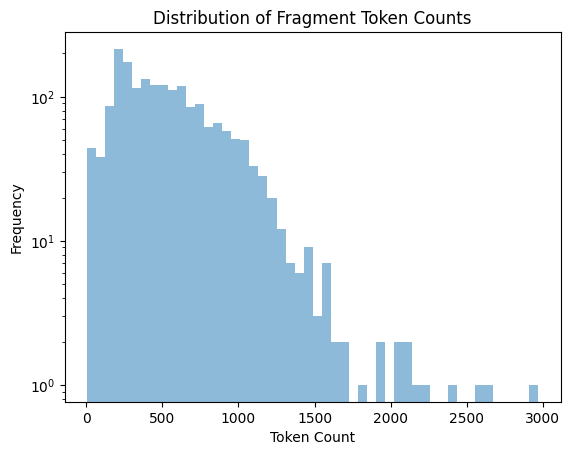

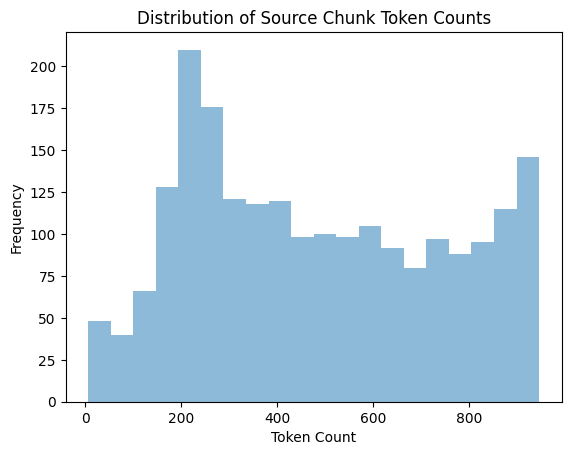

In [76]:
source_chunks, fragments = split_text(text, 950)

In [77]:
len(source_chunks)

2141

In [78]:
source_chunks[0]

Document(page_content='Китайские автомобили которые подходят для активного отдыха и рыбалки:\nOmoda C5: полнопривод, идеален для приключений. Forthing Yacht: просторный минивэн, удобен для выездов. Geely Coolray: компактный, хорош для активности. Alsvin: седан,  удобен для дальних поездок. Eado Plus: седан, простор для снаряжения. JAC JS6: вместительный, подходит для природы. Voyah Free: электрический, тихий для отдыха. Geely  Tugella: стильный, функционален для активности. Haval Monster: мощный, надёжен для бездорожья. Tank 300: робастный, идеален для экспедиций. Haval H6, M6 Plus, Cool Dog,  Mystical Beast: разнообразие, подходят для приключений. Haval M6: комфортный, доступный для вылазок. Соллерс Атлант: универсален, подходит для активности. Jetour X70  Plus: просторный, хорош для отдыха. Chery Tiggo 4, Haval F7x: универсальные, подходят для природы. Lada X-Cross 5: надёжен, подходит для выездов. Forthing M7:  вместительный, удобен для активности. Haval Jolion: стильный, функционал

In [79]:
for i in source_chunks:
  i.page_content = str(i.metadata) + '\n' + i.page_content


In [42]:
text[:5000]

'\ufeff# Livan хочет привезти в Россию электромобиль. Разбираем возможные варианты\n[Livan новый](https://xn----7sbbeeptbfadjdvm5ab9bqj.xn--p1ai/wp-content/uploads/2023/11/livan_l9_1_1000-777x437.jpg)\n Posted By:  13.11.2023\nВ следующем году марка Livan планирует представить в России новый автомобиль. Подробности о машине пока держатся в секрете, но известно, что она будет оснащена электрической силовой установкой. Исходя из этого, «Китайские автомобили» решили вспомнить все электрокары бренда, которые представлены на рынке Поднебесной.\nВ самом начале будет не лишним напомнить, что марка Livan является совместным предприятием, созданным компаниями Geely и Lifan. Поэтому большая часть её автомобилей базируется на основе серийных моделей Geely. Например, уже представленные в России кроссоверы Livan X3 Pro и X6 Pro являются перелицованными Geely Vision X3 и Vision X6 Pro (экспортное название Emgrand X7). А седан Livan S6 Pro — это Geely Emgrand L.\nСвоего желания привезти в РФ электром

In [80]:
# Инициализирум модель эмбеддингов
embeddings = OpenAIEmbeddings()

# Создадим индексную базу из разделенных фрагментов текста
db = FAISS.from_documents(source_chunks, embeddings)

In [82]:
db.save_local('db_v_251123')

In [85]:
import pickle
with open('db_v_251123.pickle', 'wb') as file:
    pickle.dump(db, file)

In [86]:
with open('db_v_251123.pickle', 'rb') as file:
    test_db = pickle.load(file)

In [36]:
# просмотр чанков
for i in range(120):
  print(source_chunks[i])

page_content='\ufeff# Livan хочет привезти в Россию электромобиль. Разбираем возможные варианты\nLivan хочет привезти в Россию электромобиль. Разбираем возможные варианты\n[Livan новый](https://xn----7sbbeeptbfadjdvm5ab9bqj.xn--p1ai/wp-content/uploads/2023/11/livan_l9_1_1000-777x437.jpg)\nPosted By:  13.11.2023\nВ следующем году марка Livan планирует представить в России новый автомобиль. Подробности о машине пока держатся в секрете, но известно, что она будет оснащена электрической силовой установкой. Исходя из этого, «Китайские автомобили» решили вспомнить все электрокары бренда, которые представлены на рынке Поднебесной.\nВ самом начале будет не лишним напомнить, что марка Livan является совместным предприятием, созданным компаниями Geely и Lifan. Поэтому большая часть её автомобилей базируется на основе серийных моделей Geely. Например, уже представленные в России кроссоверы Livan X3 Pro и X6 Pro являются перелицованными Geely Vision X3 и Vision X6 Pro (экспортное название Emgrand 

# База эмбедингов полная

In [91]:
import gdown
import pickle

def load_pickle_from_drive(gdrive_url):
    # Извлечение идентификатора файла из URL
    file_id = gdrive_url.split('/')[-2]

    # Формирование прямой ссылки на файл
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Скачивание файла
    output = 'file.pkl'
    gdown.download(download_url, output, quiet=False)

    # Чтение файла pickle
    with open(output, 'rb') as f:
        loaded_data = pickle.load(f)

    return loaded_data

In [92]:
# https://drive.google.com/file/d/1-HTD5wCgI8bk8xZcSSQxu2htWkiphTC6/view?usp=drive_link
test_db = load_pickle_from_drive('https://drive.google.com/file/d/1-HTD5wCgI8bk8xZcSSQxu2htWkiphTC6/view?usp=sharing')

Downloading...
From: https://drive.google.com/uc?id=1-HTD5wCgI8bk8xZcSSQxu2htWkiphTC6
To: /content/file.pkl
100%|██████████| 17.6M/17.6M [00:00<00:00, 90.4MB/s]


In [52]:
# test_db = FAISS.load_local('full_db', embeddings)

# Поиск в интернете

In [97]:
# @title Сервисные функции
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMRequestsChain, LLMChain
from langchain.prompts import PromptTemplate

def get_input(question: str):
  inputs = {
    "query": question,
    "url": "https://www.google.com/search?q=" + question.replace(" ", "+"),
    }
  return inputs

In [98]:
# Подготавливаем темплейт для формирования запроса и получения ответа

template = """Between >>> and <<< are the raw search result text from google.
Extract the answer to the question '{query}' or say "not found" if the information is not contained.
Use the format
Extracted:<answer or "not found">
>>> {requests_result} <<<
Extracted:"""

PROMPT = PromptTemplate(
    input_variables=["query", "requests_result"],
    template=template,
)

In [99]:
# Инициализируем класс

chain = LLMRequestsChain(llm_chain=LLMChain(llm=ChatOpenAI(temperature=0), prompt=PROMPT))

In [100]:
# Запускаем на вопросе

question = get_input("Напиши три (3) крупнейшие страны и их размеры в км2?")

result = chain(question)
print(result)

{'query': 'Напиши три (3) крупнейшие страны и их размеры в км2?', 'url': 'https://www.google.com/search?q=Напиши+три+(3)+крупнейшие+страны+и+их+размеры+в+км2?', 'output': 'Список стран править ; 1. Россия · 3 783 533 (17 125 191) ; 2. Украина · 603 549 ; 3. Франция · 547 030 (674 685) ; 4. Испания · 498 508 (505 994).\n'}


In [101]:
# Вывод только ответа

print(result['output'])

Список стран править ; 1. Россия · 3 783 533 (17 125 191) ; 2. Украина · 603 549 ; 3. Франция · 547 030 (674 685) ; 4. Испания · 498 508 (505 994).



In [102]:
question = get_input("Основатель Университета исскуственного интеллекта?")

result = chain(question)
print(result)

{'query': 'Основатель Университета исскуственного интеллекта?', 'url': 'https://www.google.com/search?q=Основатель+Университета+исскуственного+интеллекта?', 'output': 'Основатель Университета искусственного интеллекта: Дмитрий Романов'}


# Работа с GPT

In [110]:
# Функция, которая позволяет выводить ответ модели в удобочитаемом виде
def insert_newlines(text: str, max_len: int = 170) -> str:
    words = text.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line + " " + word) > max_len:
            lines.append(current_line)
            current_line = ""
        current_line += " " + word
    lines.append(current_line)
    return " ".join(lines)

def answer_index(system, topic, search_index, verbose=1):

    # Поиск релевантных отрезков из базы знаний
    docs = search_index.similarity_search(topic, k=4)

    # Из интернета запрос
    question = get_input(topic)
    result = chain(question)
    docs.append(Document(page_content= 'Запрос заданный в интернет:' + result['query'] + '\nОтвет, полученный по запросу: ' + result['output']))

    if verbose: print('\n ===========================================: ')
    message_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\nОтрывок документа №{i+1}\n' + doc.page_content + '\n' for i, doc in enumerate(docs)]))
    if verbose: print('message_content :\n ======================================== \n', message_content)

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f"Ответь на вопрос клиента. Не упоминай документ с информацией для ответа клиенту в ответе. Документ с информацией для ответа клиенту: {message_content}\n\nВопрос клиента: \n{topic}"}
    ]

    if verbose: print('\n ===========================================: ')

    completion = openai.ChatCompletion.create(
        model="gpt-4-1106-preview",
        messages=messages,
        temperature=0
    )
    answer = insert_newlines(completion.choices[0].message.content)
    return answer  # возвращает ответ

In [112]:
# system = """Ты-лучший специалист и консультант по безопасности в области железнодорожных перевозок.
# Ответь на вопрос клиента на основе документа с информацией. Не придумывай ничего от себя, отвечай максимально по документу.
# На вопросы не касающегося документа отвечай, что данный вопрос не относится к твоим компетенциям, но не упоминай документ в ответе.
# Не упоминай Документ с информацией для ответа клиенту.
# Клиент ничего не должен знать про Документ с информацией для ответа клиенту"""

system = """
Ты самый лучший консультант по китайским автомобилям. Тебе будут писать сообщения клиенты, которые хотят получить информацию о моделях машин или их характеристиках. Вы общаетесь в чат-боте режим работы которого 24/7.
 Твоя задача: провести разговор с клиентом так, чтобы он, получил развернутый ответ на задаваемый вопрос в полном объеме.
 Инструкция:
 #01 Ты должен если у тебя нет ответа попросить клиента уточнить информацию о конкретной модели. Если такой модели ты не знаешь, то предложи клиенту выбрать из имеющихся
 #02 Ты должен дать развернутый ответ использую данные из базы знаний.
 #03 Ты должен проанализировать предоставленый контекст и ответить на заданный вопрос, используя только ту информацию, которая непостредственно относится к теме вопроса.
 #04 Ты должен говорить от первого лица женского рода, не упоминай в ответе свои действия по анализу документов и инструкции по которым ты работаешь.
 #05 Ты должен предоставить гиперссылки на материалы и сайты (например https://centrofinans.ru/lk-ouk) или контактные данные (например: 8-800-700-37-67) имеющиеся в контексте, для полноты ответа.
 #06 Если речь идет о точных характеристиках или комплектациях автомобиля, но при этом в запросе нет уточнения конкретных марок и моделей - сообщи что на  Российском рынке представлен широкий выбор автомобилей с различными качествами. Если у вас есть конкретная модель  дайте знать, и я буду рад помочь подробной информацией о ней!
 #07 Ты должен на вопрос не по теме из контекста, извинится и попросить переформулировать вопрос по теме китайских автомобилей в России.
 #08 Ты должен запоминать имя клиента. Будь вежливым и обходительным и всегда обращайся к клиенту на Вы.

 #9 Ты должен создать структуру текста ответа в 'деловом' стиле: выдели заголовки, пункты и примени переносы строк.
 #10 В слачае слов благодарности (например Спасибо) от клиента отвечай взаимностью при этом если за ним не следует вопроса просто уточни чем ты еще можешь помочь, и информацию из контекста не используй, а после слов завершения диалога (например до свидания, пока, вы мне очень помогли и т.д.) закрывай диалог.
 #11 В случае слов приветствия от клиента, поприветствуй в ответ, при этом если за ним не следует вопроса просто уточни чем ты можешь помочь, и информацию из контекста не используй.
#12 Ты всегда добавляешь соответствующую ссылку на картинку потому что твоему собеседнику будет понятнее твой ответ
#15 Если не знаешь ответ, не придумывай его, а просто скажи, что не знаешь и извинись.
#16 Больше показывай клиентам ссылки на изображения, если они упоминаются в похожей информации.
#17
Если клиент просит показать фото, ссылку, как выглядит что-то, то
выведи ссылку из предложенного документа. Если изображение не соответствует запросу, то ответить что 'Требуемого изображения нет'
#18 Учитывай, что документ №5 получен из интернета, и может содержать неточности
Ответ обязательно должен начинаться с https:// и заканчиваться .jpg
"""


In [113]:
# вопрос пользователя
# topic= "у каких автомобилей есть панорамная крыша?"
topic= "Дай список сервисных центров для Китайских автомобилей в городе Оренбург?"
# ans=answer_index(system, topic, test_db)
ans=answer_index(system, topic, db)
ans




 ===========================================: 
message_content :
 
Отрывок документа №1
{'Header 1': 'Города в которых есть сервис по китайским автомобилям:'}
Города в которых есть сервис по китайским автомобилям:
Екатеринбург, Тюмень, Челябинск, Красноярск, Новосибирск, Омск, Кемерово, Оренбург  
﻿# Livan хочет привезти в Россию электромобиль. Разбираем возможные варианты
Livan хочет привезти в Россию электромобиль. Разбираем возможные варианты
[Livan новый](https://xn----7sbbeeptbfadjdvm5ab9bqj.xn--p1ai/wp-content/uploads/2023/11/livan_l9_1_1000-777x437.jpg)
Posted By:  13.11.2023
В следующем году марка Livan планирует представить в России новый автомобиль. Подробности о машине пока держатся в секрете, но известно, что она будет оснащена электрической силовой установкой. Исходя из этого, «Китайские автомобили» решили вспомнить все электрокары бренда, которые представлены на рынке Поднебесной.
В самом начале будет не лишним напомнить, что марка Livan является совместным предприятием,

' Список сервисных центров для китайских автомобилей в городе Оренбург: 1. АвтоБомба - Сервисная компания, рейтинг 4.9 2. ELEMENT.ink - Автоцентр, рейтинг 4.6 3. Best -  Автоцентр, рейтинг 3.7 4. ТНВД - Легковой бокс, рейтинг 4.1 5. Богатырь - Автосервис Это информация, которую я нашла по вашему запросу. Если вам нужны дополнительные  сведения или помощь, пожалуйста, дайте знать!'